In [1]:
# Standaard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Opmaak
plt.rcParams["figure.figsize"] = (10,5)

## Data Voorbereiden

In [2]:
# Lees dataset (zie Brightspace map van dezelfde week)
ts = pd.read_csv('daily-min-temperatures.txt')
ts

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
...,...,...
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7


In [3]:
# Let op dat de Date kolom als object begint
print(ts.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3650 non-null   object 
 1   Temp    3650 non-null   float64
dtypes: float64(1), object(1)
memory usage: 57.2+ KB
None


In [4]:
# Converteer naar datetime
ts['Date'] = pd.to_datetime(ts['Date'])
ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3650 non-null   datetime64[ns]
 1   Temp    3650 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 57.2 KB


In [5]:
# Zet date in als index ipv kolom
ts = ts.set_index('Date')

# Check de shape van je dataset (nu gewoon een feature)
print(ts.shape)
ts.head()

(3650, 1)


,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


<Axes: xlabel='Date'>

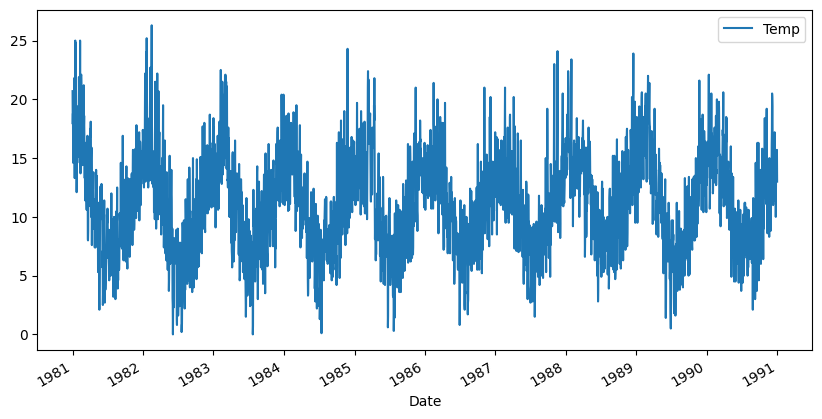

In [6]:
# Plot je dataset
ts.plot()

In [7]:
# Bekijk de summary statistieken
ts.describe()

,Temp
count,3650.000000
mean,11.177753
std,4.071837
min,0.000000
25%,8.300000
50%,11.000000
75%,14.000000
max,26.300000


# Resample

In [8]:
# Check of je dagen ('1d') hebt zonder een datapunt
# Mean kan vervangen zijn met andere summary statistiek om een punt per dag te maken
ts.resample('1d').mean().loc[ts.resample('1d').mean().isna()['Temp']]

,Temp
Date,
1984-12-31,NaN
1988-12-31,NaN


In [9]:
# Handmatig inspecteren dat die dag ontbreekt
ts.loc['1984-12']

,Temp
Date,
1984-12-01,12.6
1984-12-02,10.8
1984-12-03,9.1
1984-12-04,11.0
1984-12-05,13.0
1984-12-06,12.8
1984-12-07,9.9
1984-12-08,11.6
1984-12-09,10.5


In [10]:
# Interpoleer (default=linear) je missende waardes
ts2 = ts.resample('1d').mean().interpolate()

# Controleer dat alle NaN's weg zijn
ts2.loc[ts2['Temp'].isna()]

,Temp
Date,


In [11]:
# Creer nieuwe kolom van maand info
ts2['Month'] = ts2.index.month

# Je kan op basis van een bepaalde maand filteren
ts2.loc['1986 Feb'].head(10)

,Temp,Month
Date,,
1986-02-01,14.6,2
1986-02-02,14.8,2
1986-02-03,10.7,2
1986-02-04,11.6,2
1986-02-05,13.6,2
1986-02-06,14.4,2
1986-02-07,11.8,2
1986-02-08,15.8,2
1986-02-09,16.0,2


In [12]:
# Je kan ook een nieuwe frequentie kiezen (hier een halve dag)
ts.resample('12h').mean()

,Temp
Date,
1981-01-01 00:00:00,20.7
1981-01-01 12:00:00,NaN
1981-01-02 00:00:00,17.9
1981-01-02 12:00:00,NaN
1981-01-03 00:00:00,18.8
...,...
1990-12-29 00:00:00,13.5
1990-12-29 12:00:00,NaN
1990-12-30 00:00:00,15.7


In [13]:
# En dan interpoleren voor de missende waardes (nu dubbel wat je ooit had)
# Maar in deze context is het niet logisch (middernacht is niet warmer dan 12u 's middags')
ts.resample('12h').mean().interpolate()

,Temp
Date,
1981-01-01 00:00:00,20.70
1981-01-01 12:00:00,19.30
1981-01-02 00:00:00,17.90
1981-01-02 12:00:00,18.35
1981-01-03 00:00:00,18.80
...,...
1990-12-29 00:00:00,13.50
1990-12-29 12:00:00,14.60
1990-12-30 00:00:00,15.70


In [14]:
# Als je een lijst van alle jaren in je dataset wilt zien...
ts.index.year

Index([1981, 1981, 1981, 1981, 1981, 1981, 1981, 1981, 1981, 1981,
       ...
       1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990],
      dtype='int32', name='Date', length=3650)

<Axes: xlabel='Date'>

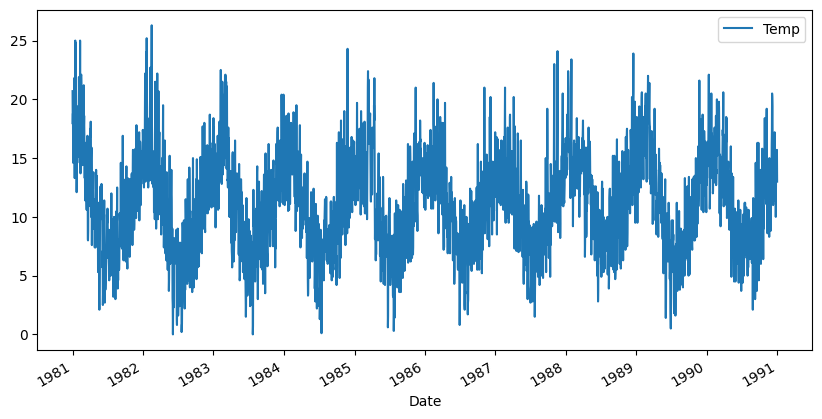

In [15]:
# Of wilt inzoemen kan je de volgende stappen uitvoeren:
# Nogmaals de volledige plot
ts.plot()

<Axes: xlabel='Date'>

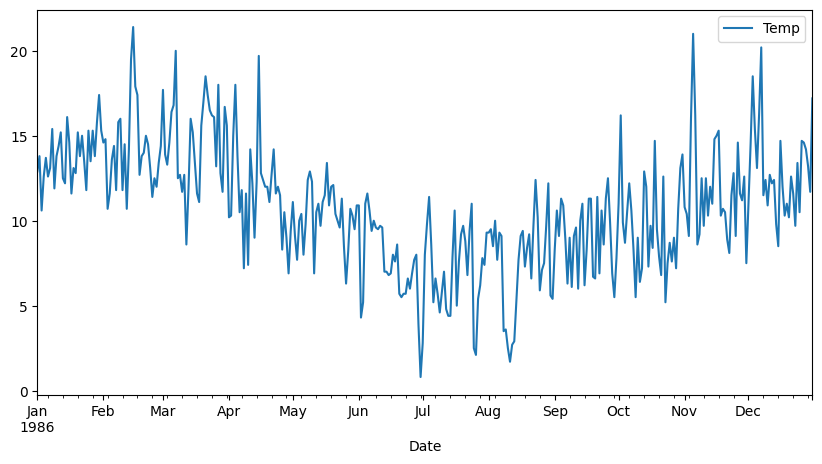

In [16]:
# En dan ingezoomd op 1986
ts.loc['1986'].plot()

<Axes: xlabel='Date'>

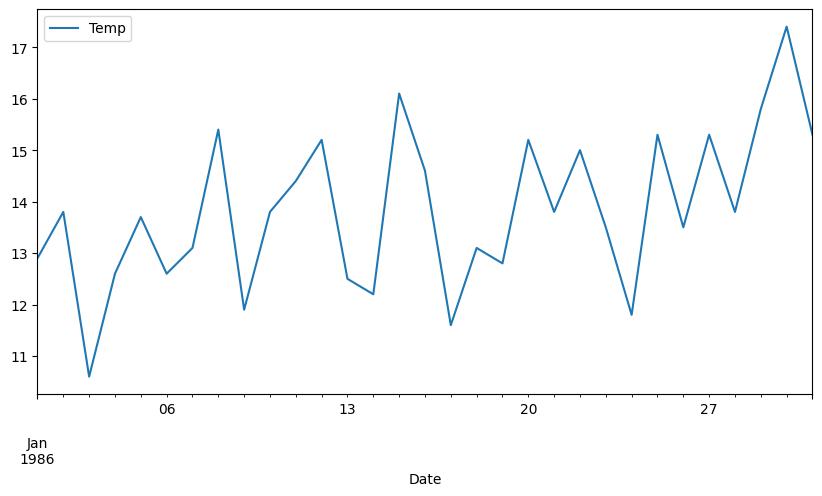

In [17]:
# En verder op januari 1986
ts.loc['1986-01'].plot()

## ACF en PACF

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
# ACF plot maken (dus verdwijnt exponentieel)
plot_acf(ts)
ax = plt.gca()
ax.set_ylim([-0.20,1.05])
plt.show()

In [ ]:
# PACF plot maken
# Significantie is hier moeilijk: het is minstens AR(1) vanwege dat het tweede punt super hoog is
# Maar punten t/m lag 20 zijn technische gezien nog steeds significant (dus kan ook AR(20))
plot_pacf(ts)
ax = plt.gca()
ax.set_ylim([-0.20,1.05])
plt.show()

In [ ]:
# Converteer naar gemiddelde per maand
# Dus len(dataset)/12 datapunten = sporadischer en dus meer variantie
ts2 = ts.resample('1M').mean()
ts2.plot()
ts2.head() # vermelde datums verschijnen als de laatste dag vd maand

In [ ]:
# ACF plot maken (je ziet een soort seizoensgebonden patroon)
plot_acf(ts2)
ax = plt.gca()
ax.set_ylim([-0.90,1.10])
plt.show()

In [ ]:
# PACF plot maken
# Ook moeilijk om deze uit te vogelen, maar kijk naar de absolute waardes van alle punten
# Deze lijkt om exponentieel te dalen, minstens binnen een seizoen
# Dus zou misschien betekenen dat de maandelijkse dataset is meer een Moving Average
# Om terug te kijken naar de ACF, zou je misschien zeggen MA(2-4), afhankelijk van het seizoen
plot_pacf(ts2, lags=30)
ax = plt.gca()
ax.set_ylim([-.90,1.10])
plt.show()

## Seasonal Decomposition

In [ ]:
from statsmodels.tsa.seasonal import STL

In [ ]:
# Plot decompositie
res = STL(ts,period=365).fit()
res.plot()
plt.show()

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
# Probeer eenvoudige exponentiele smoothing (dus geen trend/seizoen)
fit = ExponentialSmoothing(ts2,seasonal_periods=None,trend=None,seasonal=None,initialization_method='estimated')\
                      .fit(smoothing_level=None,smoothing_trend=None,smoothing_seasonal=None)

ax = ts2.plot(figsize=(10,6), marker='o')
fit.fittedvalues.plot(ax=ax, style='--')
fit.forecast(50).rename('Single ES').plot(ax=ax, style='--', color='C1',legend=True)
plt.show()

In [ ]:
# Gebruik dubbel exponentiele smoothing door en trend toe te voegen
fit = ExponentialSmoothing(ts2,seasonal_periods=None,trend='add',seasonal=None,initialization_method='estimated')\
                      .fit(smoothing_level=None,smoothing_trend=None,smoothing_seasonal=None)

ax = ts2.plot(figsize=(10,6), marker='o')
fit.fittedvalues.plot(ax=ax, style='--')
fit.forecast(50).rename('Double ES').plot(ax=ax, style='--', color='C1',legend=True)
plt.show()

In [ ]:
# Gebruik tripel exponentiele smoothing (i.e. Holt-Winters) door seasonal toe te voegen
# Als voorspellend model is dit duidelijk de beste van de drie
fit = ExponentialSmoothing(ts2,seasonal_periods=None,trend='add',seasonal='add',initialization_method='estimated')\
                      .fit(smoothing_level=None,smoothing_trend=None,smoothing_seasonal=None)

ax = ts2.plot(figsize=(10,6), marker='o')
fit.fittedvalues.plot(ax=ax, style='--')
fit.forecast(50).rename('Holt-Winters').plot(ax=ax, style='--', color='C1',legend=True)
plt.show()

In [ ]:
# Bekijk de parameters van jouw Holt-Winters fit
fit.params

## ARIMA 

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
# Fit een ARIMA model
# Voel je vrij om de parameters voor order en seasonal_order aan te passen
# Parameters order: AR(p), diff(d), MA(q)
# Parameters seasonal: dezelfde + season(s)

fit = ARIMA(ts2,order=(1,0,0),seasonal_order=(1,0,0,12),freq='M').fit()

ax = ts2.plot(figsize=(10,6), marker='o')
fit.fittedvalues.plot(ax=ax, style='--')
fit.forecast(100).rename('ARIMA').plot(ax=ax, style='--', color='C1',legend=True)
plt.show()

In [ ]:
# Voorspel de volgende x waardes na het einde van jouw tijdreeks
fit.forecast(10)

In [ ]:
# LET OP: als je je code aanpast zodat deze 'doet', kan het zijn dat je hele omgeving in Anacondas niet meer gaat doen
# Dus voorlopig deze niet proberen

# %pip install pmdarima
# import pmdarima as pm

In [ ]:
# model = pm.auto_arima(ts2, seasonal=True, m=12)

In [ ]:
# model